In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
dataset = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [3]:
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
dataset.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [7]:
dataset.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

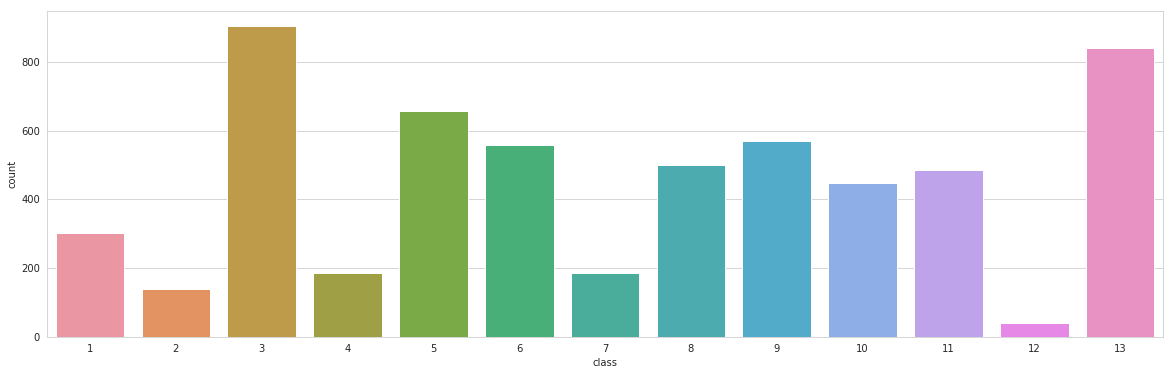

In [8]:
plt.figure(figsize=(20, 6))
sns.countplot(x='class', data=dataset)

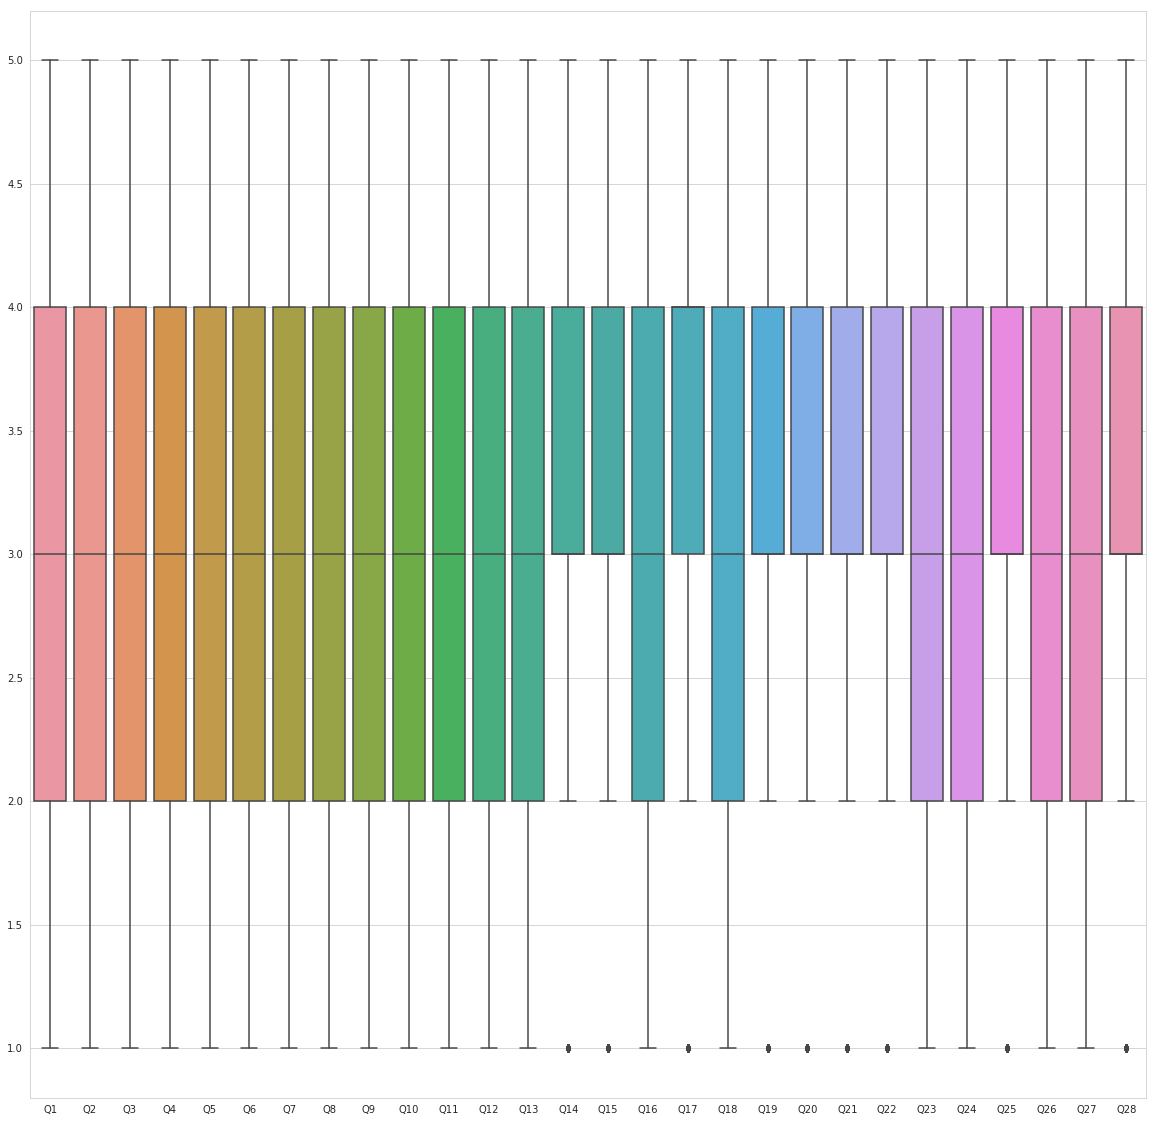

In [12]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=dataset.iloc[:,5: ]);

In [27]:
#calculate mean for each question for all the classes
classes = list(range(1,14))
#Q1-Q12 are for class
questions = ['Q'+str(i) for i in range(1,13)]
totalplotdata = pd.DataFrame()
for class_num in classes:
    class_group = dataset[dataset['class']==class_num]
    questionmeans = []
    for q in questions:
        questionmeans.append(class_group.loc[:,q].mean())
    class_list = 12 * [class_num]
    plotdata = pd.DataFrame(list(zip(class_list, questions, questionmeans)), columns=['class','questions','mean'])
    #print(list(zip(class_list, questions, questionmeans)))
    totalplotdata = totalplotdata.append(plotdata, ignore_index = True)
    

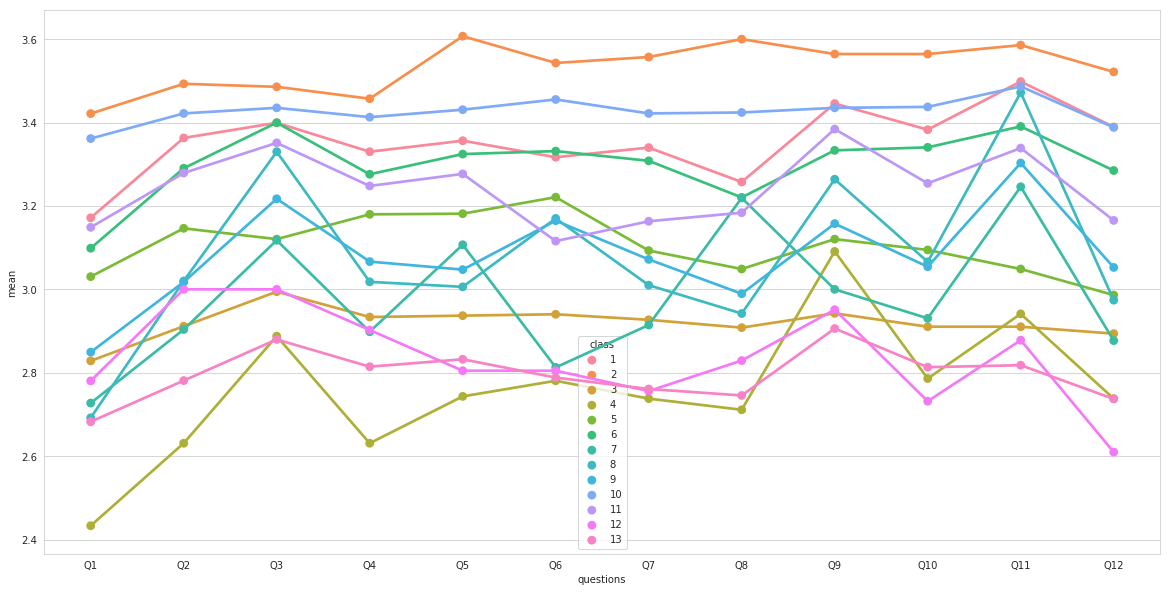

In [28]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

In [32]:
#calculate mean for each question for all the instructors
instructors = list(range(1,4))
#Q13-Q28 are for class
questions = ['Q'+str(i) for i in range(13,29)]
totalplotdata = pd.DataFrame()
for instr_num in instructors:
    instr_group = dataset[dataset['instr']==instr_num]
    questionmeans = []
    for q in questions:
        questionmeans.append(instr_group.loc[:,q].mean())
    instr_list = 16 * [instr_num]
    plotdata = pd.DataFrame(list(zip(instr_list, questions, questionmeans)), columns=['class','questions','mean'])
    #print(list(zip(class_list, questions, questionmeans)))
    totalplotdata = totalplotdata.append(plotdata, ignore_index = True)
    

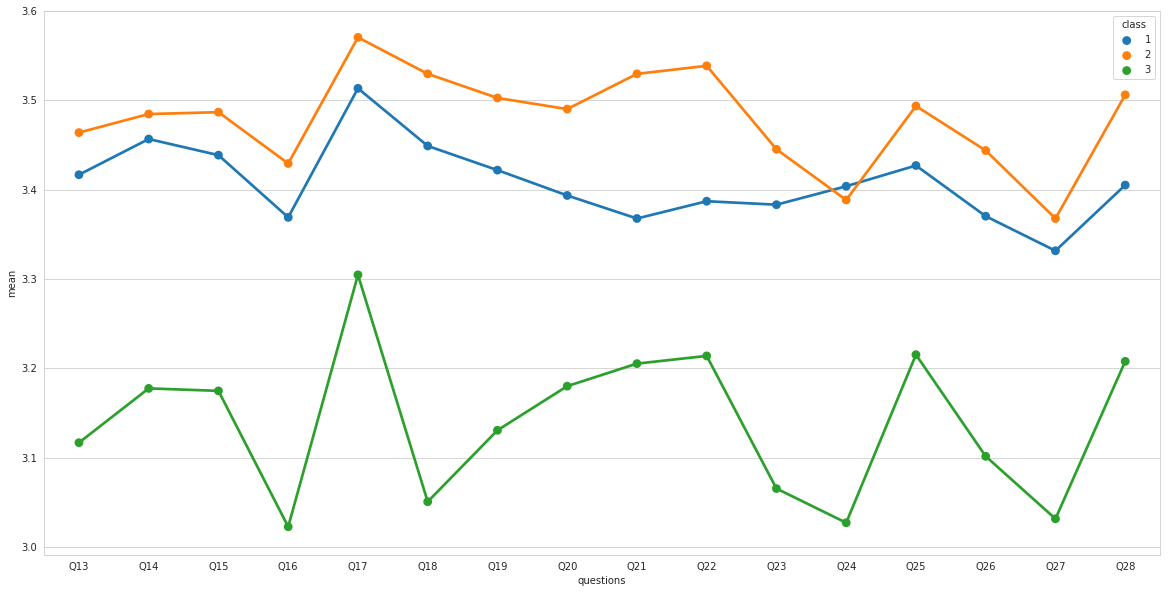

In [33]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

In [36]:
# solve problem for instr 3 studying the class performance
dataset_inst3 = dataset[(dataset["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questions = ['Q'+str(i) for i in range(1,13)]
totalplotdata = pd.DataFrame()
for class_num in class_array_for_inst3:
    class_group = dataset_inst3[dataset_inst3['class']==class_num]
    questionmeans = []
    for q in questions:
        questionmeans.append(class_group.loc[:,q].mean())
    class_list = 12 * [class_num]
    plotdata = pd.DataFrame(list(zip(class_list, questions, questionmeans)), columns=['class','questions','mean'])
    #print(list(zip(class_list, questions, questionmeans)))
    totalplotdata = totalplotdata.append(plotdata, ignore_index = True)

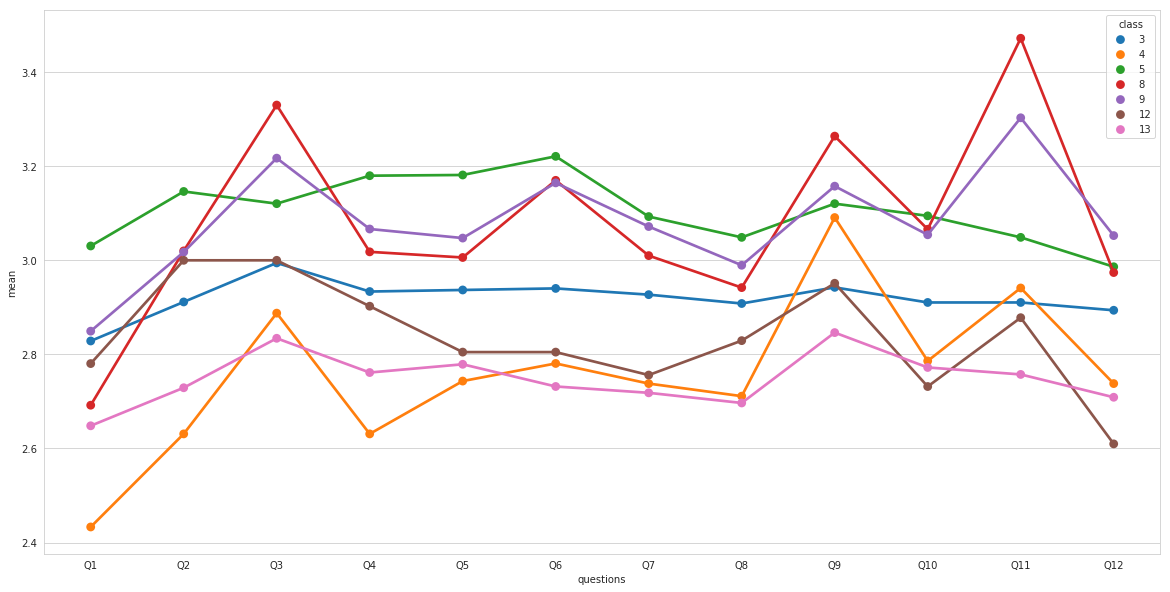

In [38]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

In [ ]:
#class 4 and 13 are low rated

## Cluster all the students based on the Question responses data.

In [39]:
dataset_questions = dataset.iloc[:,5:33]
dataset_questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)
dataset_questions_pca.shape

(5820, 2)

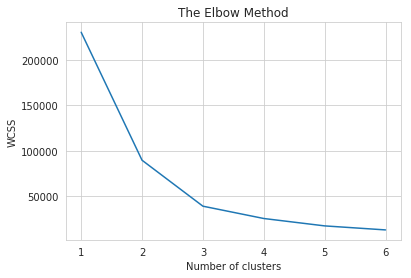

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()#kmeans cluster = 3

In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

In [74]:
y_kmeans

array([2, 2, 1, ..., 1, 0, 0], dtype=int32)

In [75]:
dataset_questions_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.4047942 ],
       [11.56931918,  0.4047942 ]])

In [76]:
dataset_questions_pca.shape

(5820, 2)

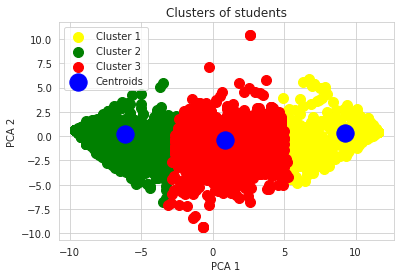

In [81]:
# Visualising the clusters
plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
#plt.scatter(dataset_questions_pca[y_kmeans == 3, 0], dataset_questions_pca[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [78]:
kmeans.cluster_centers_

array([[ 9.27108274,  0.29226153],
       [-6.11471106,  0.21312901],
       [ 0.87776418, -0.35380669]])

In [82]:
import collections
collections.Counter(y_kmeans)

Counter({2: 2359, 1: 2221, 0: 1240})

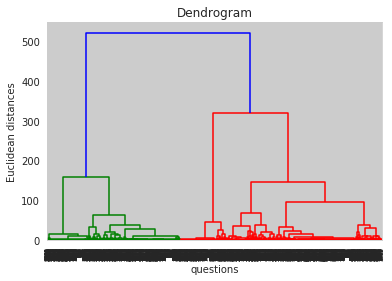

In [83]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

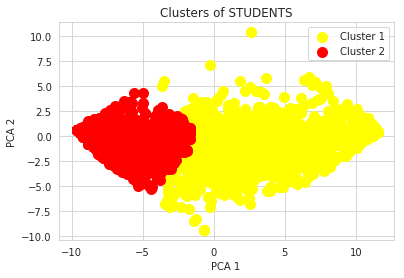

In [84]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [86]:
collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})